# MOVIE RATING PREDICTION WITH PYTHON

1) Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.
2) The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.
3) Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
4) learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.

### Importing libraries

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# warnings
import warnings
warnings.filterwarnings('ignore')

# split data
from sklearn.model_selection import train_test_split

# Linear Regression
from sklearn.linear_model import LinearRegression

# calculate accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

### Importing & printing dataset

In [92]:
df = pd.read_csv("IMDb_Movies_India.csv", encoding = "ISO-8859-1")
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [93]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [94]:
df.shape

(15509, 10)

In [95]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


### Data Filtering & Preprocessing

In [97]:
unique_genres = df["Genre"].unique()
unique_genres

array(['Drama', 'Drama, Musical', 'Comedy, Romance',
       'Comedy, Drama, Musical', 'Drama, Romance, War', 'Documentary',
       'Horror, Mystery, Thriller', 'Action, Crime, Thriller', 'Horror',
       'Horror, Romance, Thriller', 'Comedy, Drama, Romance', 'Thriller',
       'Comedy, Drama', nan, 'Comedy, Drama, Fantasy',
       'Comedy, Drama, Family', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Biography', 'Comedy, Horror', 'Action',
       'Drama, Horror, Mystery', 'Comedy', 'Action, Thriller',
       'Drama, History', 'Drama, History, Sport',
       'Horror, Mystery, Romance', 'Horror, Mystery',
       'Drama, Horror, Romance', 'Action, Drama, History',
       'Action, Drama, War', 'Comedy, Family',
       'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'War', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Drama, Romance', 'Adventure, Drama', 'Comedy, Mystery, Thriller',
       'Action, Crime, Dr

In [98]:
rating_counts = df["Rating"].value_counts()
rating_counts

6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: Rating, Length: 84, dtype: int64

In [99]:
df.dropna(subset = ["Name", "Year", "Duration", "Votes", "Rating"], inplace=True)

In [100]:
df.shape

(5851, 10)

In [101]:
df.drop_duplicates(inplace=True)

In [102]:
df.shape

(5851, 10)

In [103]:
df.isna().sum()

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64

### Data Visualizing

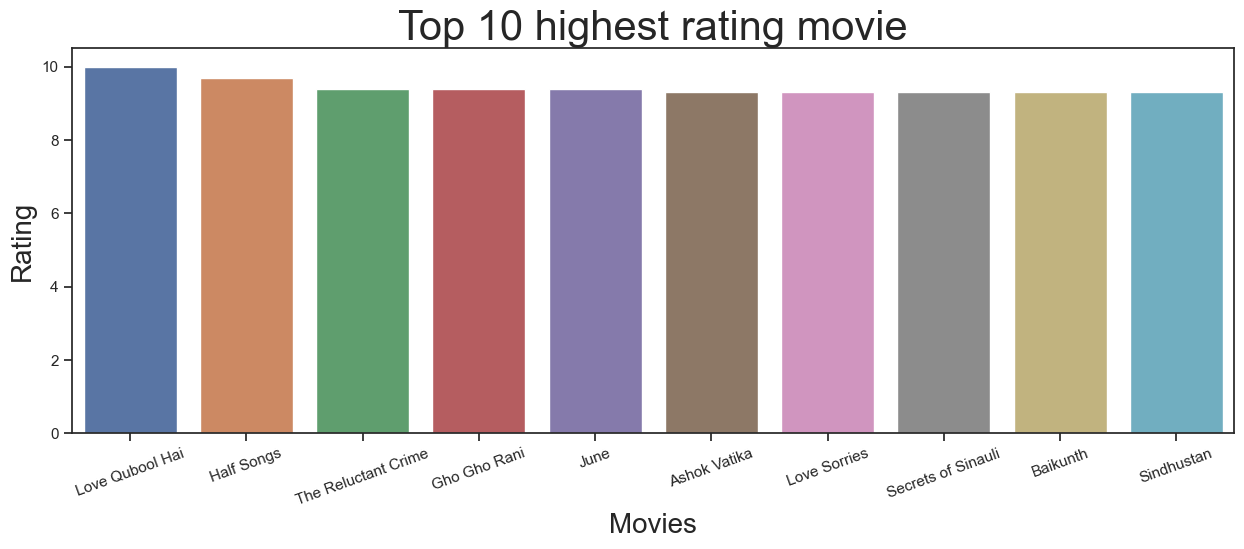

In [104]:
top_ten_movies = df.sort_values(by = "Rating", ascending = False).head(10)

plt.figure(figsize = (15, 5))

sns.barplot(top_ten_movies["Name"], top_ten_movies["Rating"])
plt.xticks( rotation = 20)
plt.title("Top 10 highest rating movie", size = 30)
plt.xlabel("Movies", size = 20)
plt.ylabel("Rating", size = 20)

plt.show()

In [105]:
actors_full_name = pd.concat([df["Actor 1"], df["Actor 2"], df["Actor 3"]])

In [106]:
actors_movie_count = actors_full_name.value_counts().reset_index()
actors_movie_count.columns = ["Actors full name", "Movie count"]
actors_movie_count.head()

,Actors full name,Movie count
0,Mithun Chakraborty,160
1,Amitabh Bachchan,148
2,Dharmendra,146
3,Ashok Kumar,125
4,Akshay Kumar,120


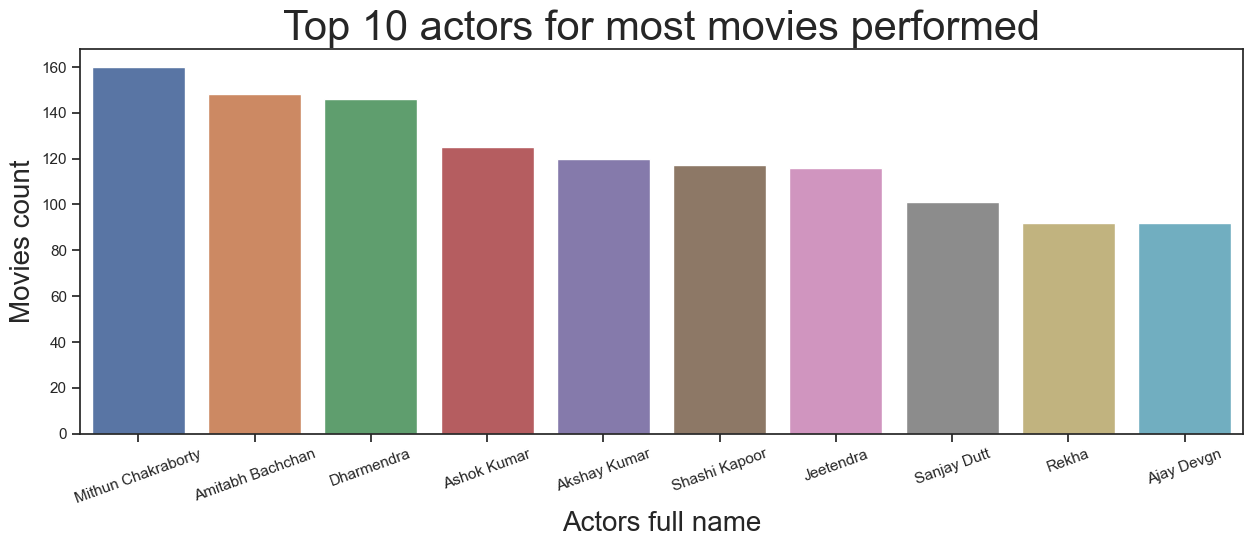

In [107]:
plt.figure(figsize = (15,5))

sns.barplot(data = actors_movie_count.head(10), x = "Actors full name", y = "Movie count")
plt.title("Top 10 actors for most movies performed", size = 30)
plt.xlabel("Actors full name", size = 20)
plt.ylabel("Movies count", size = 20)
plt.xticks(rotation = 20)

plt.show()

In [108]:
df["Votes"] = pd.to_numeric(df["Votes"], errors = "coerce")

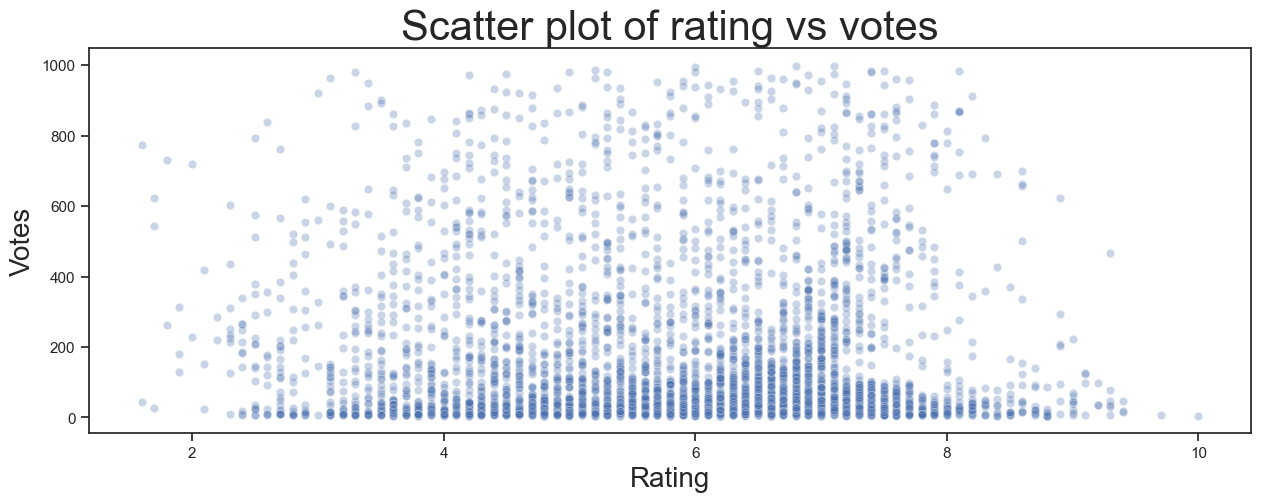

In [109]:
plt.figure(figsize = (15,5))

sns.scatterplot(df["Rating"], df["Votes"], alpha = .3)
plt.title("Scatter plot of rating vs votes", size = 30)
plt.xlabel("Rating", size = 20)
plt.ylabel("Votes", size = 20)

plt.show()

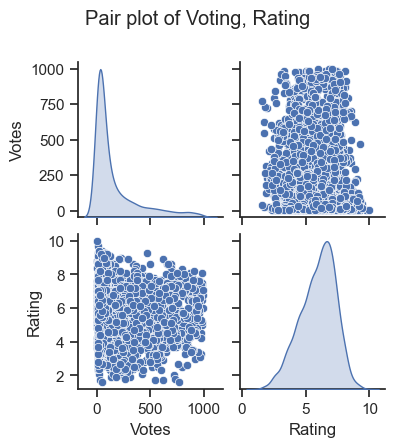

In [110]:
sns.pairplot(df[["Votes", "Rating", "Duration", "Year"]], diag_kind = "kde", markers = "o", size = 2)
plt.suptitle("Pair plot of Voting, Rating", y = 1.1)
plt.show()

In [111]:
corr_matrix = df[["Votes", "Rating", "Duration", "Year"]].corr()
corr_matrix

,Votes,Rating
Votes,1.000000,-0.045514
Rating,-0.045514,1.000000


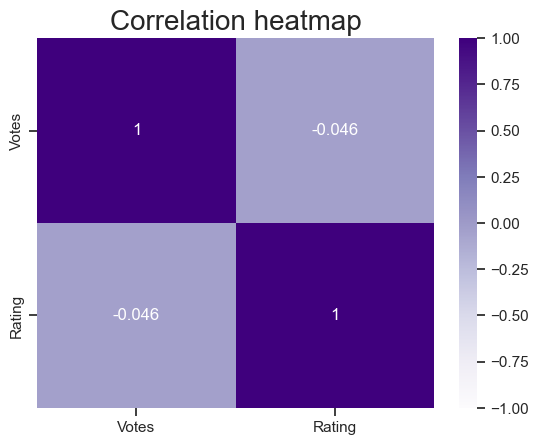

In [112]:
sns.heatmap(corr_matrix, annot = True, cmap = "Purples", vmin = -1, vmax = 1)
plt.title("Correlation heatmap", size = 20)
plt.show()

### Feature Scaling

In [113]:
df_sorted = df.sort_values(by = "Votes", ascending = False)
df_sorted["Vote count percentile"] = df_sorted["Votes"].rank(pct = True) * 100
df_sorted.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Vote count percentile
12569,Satyam Shivam Sundaram: Love Sublime,(1978),172 min,"Drama, Romance",7.1,999.0,Raj Kapoor,Shashi Kapoor,Zeenat Aman,Kanhaiyalal Chaturvedi,100.000000
5663,Hera Pheri,(1976),164 min,"Action, Comedy, Crime",6.8,998.0,Prakash Mehra,Saira Banu,Vinod Khanna,Amitabh Bachchan,99.977689
7930,Kurukshetra,(2000),129 min,"Action, Crime, Drama",6.0,996.0,Mahesh Manjrekar,Mukesh Rishi,Sanjay Dutt,Mahima Chaudhry,99.955377
3961,Dishkiyaoon,(2014),119 min,"Action, Thriller",5.2,986.0,Sanamjit Singh Talwar,Harman Baweja,Harsh Chhaya,Sunny Deol,99.933066
7083,Kadvi Hawa,(2017),95 min,Drama,8.1,985.0,Nila Madhab Panda,Nilamadhab Panda,Sanjay Mishra,Ranvir Shorey,99.899598


In [114]:
df_sorted.reset_index(drop = True, inplace = True)
df_sorted.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Vote count percentile
0,Satyam Shivam Sundaram: Love Sublime,(1978),172 min,"Drama, Romance",7.1,999.0,Raj Kapoor,Shashi Kapoor,Zeenat Aman,Kanhaiyalal Chaturvedi,100.000000
1,Hera Pheri,(1976),164 min,"Action, Comedy, Crime",6.8,998.0,Prakash Mehra,Saira Banu,Vinod Khanna,Amitabh Bachchan,99.977689
2,Kurukshetra,(2000),129 min,"Action, Crime, Drama",6.0,996.0,Mahesh Manjrekar,Mukesh Rishi,Sanjay Dutt,Mahima Chaudhry,99.955377
3,Dishkiyaoon,(2014),119 min,"Action, Thriller",5.2,986.0,Sanamjit Singh Talwar,Harman Baweja,Harsh Chhaya,Sunny Deol,99.933066
4,Kadvi Hawa,(2017),95 min,Drama,8.1,985.0,Nila Madhab Panda,Nilamadhab Panda,Sanjay Mishra,Ranvir Shorey,99.899598


In [115]:
df_sorted.shape

(5851, 11)

In [116]:
df.shape

(5851, 10)

In [117]:
df.dropna(subset = ["Votes"], inplace = True)
df.shape

(4482, 10)

### Data spliting, training and testing

In [118]:
df["Year"] = df["Year"].str.extract('(\d+)').astype(float)
df["Duration"] = df["Duration"].str.extract('(\d+)').astype(float)

In [119]:
x = df[["Year", "Duration", "Votes"]].values
y = df["Rating"].values

In [186]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .01, random_state = 100)

In [187]:
reg = LinearRegression()

In [188]:
reg.fit(x_train, y_train)

LinearRegression()

In [189]:
y_pred = reg.predict(x_test)

In [207]:
mean_err = mean_absolute_error(y_test, y_pred)
mean_sqd_err = mean_squared_error(y_test, y_pred)
r2_scr = r2_score(y_test, y_pred)

print(" Mean absolute error:", mean_err, "\n", "Mean squared error:", mean_sqd_err, "\n", "R-squared score:", r2_scr)

 Mean absolute error: 1.0228353184923813 
 Mean squared error: 1.5370787543585414 
 R-squared score: 0.1622838878726095


### Visualizing the predicted data

In [190]:
length = np.arange(len(y_pred))

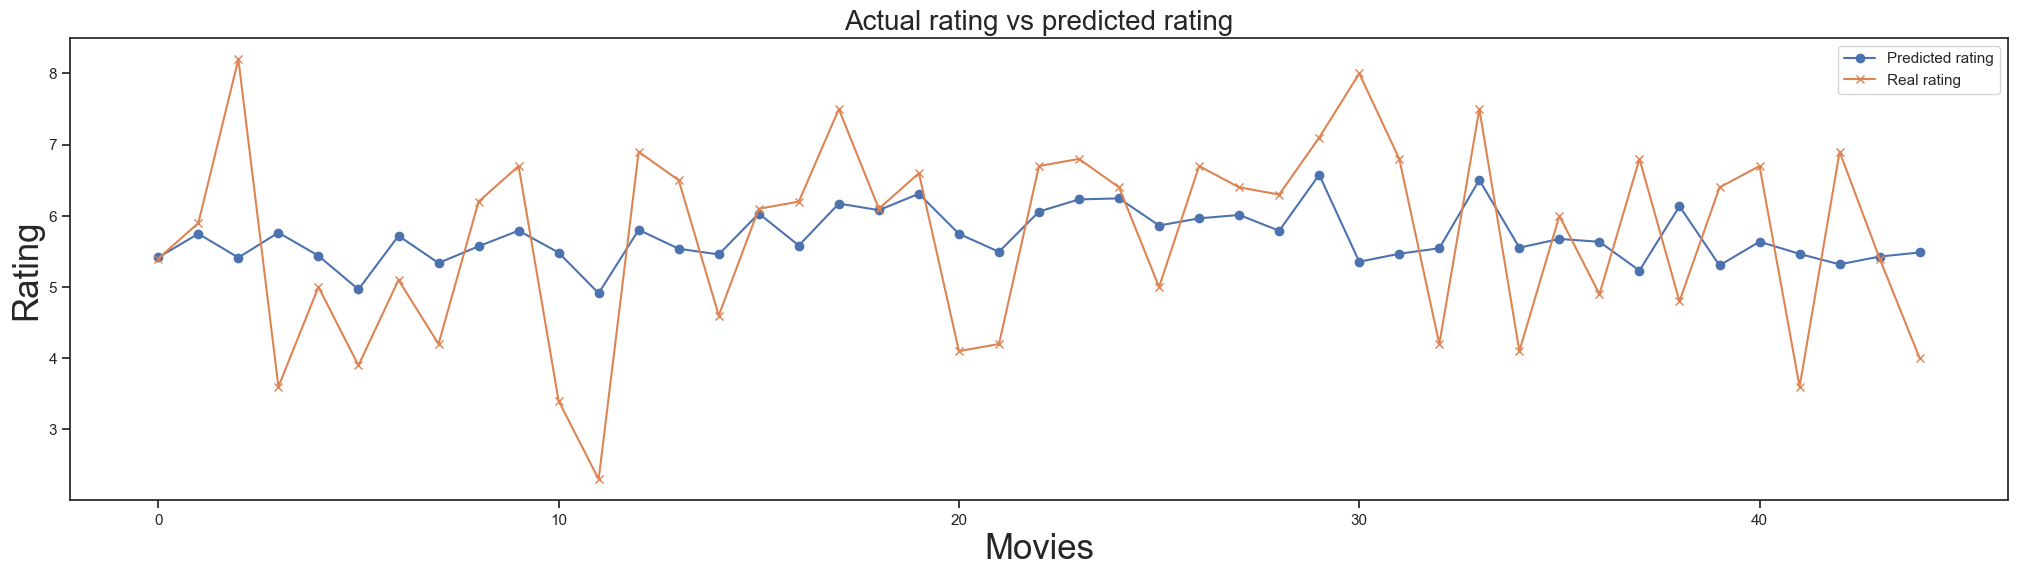

In [213]:
plt.figure(figsize = (25, 6))

plt.plot(length, y_pred, label = "Predicted rating", marker = "o")
plt.plot(length, y_test, label = "Real rating", marker = "x")
plt.title("Actual rating vs predicted rating", size = 20)
plt.ylabel("Rating", size = 25)
plt.xlabel("Movies", size = 25)

plt.legend()
plt.show()

In [192]:
pred_err = y_test - y_pred

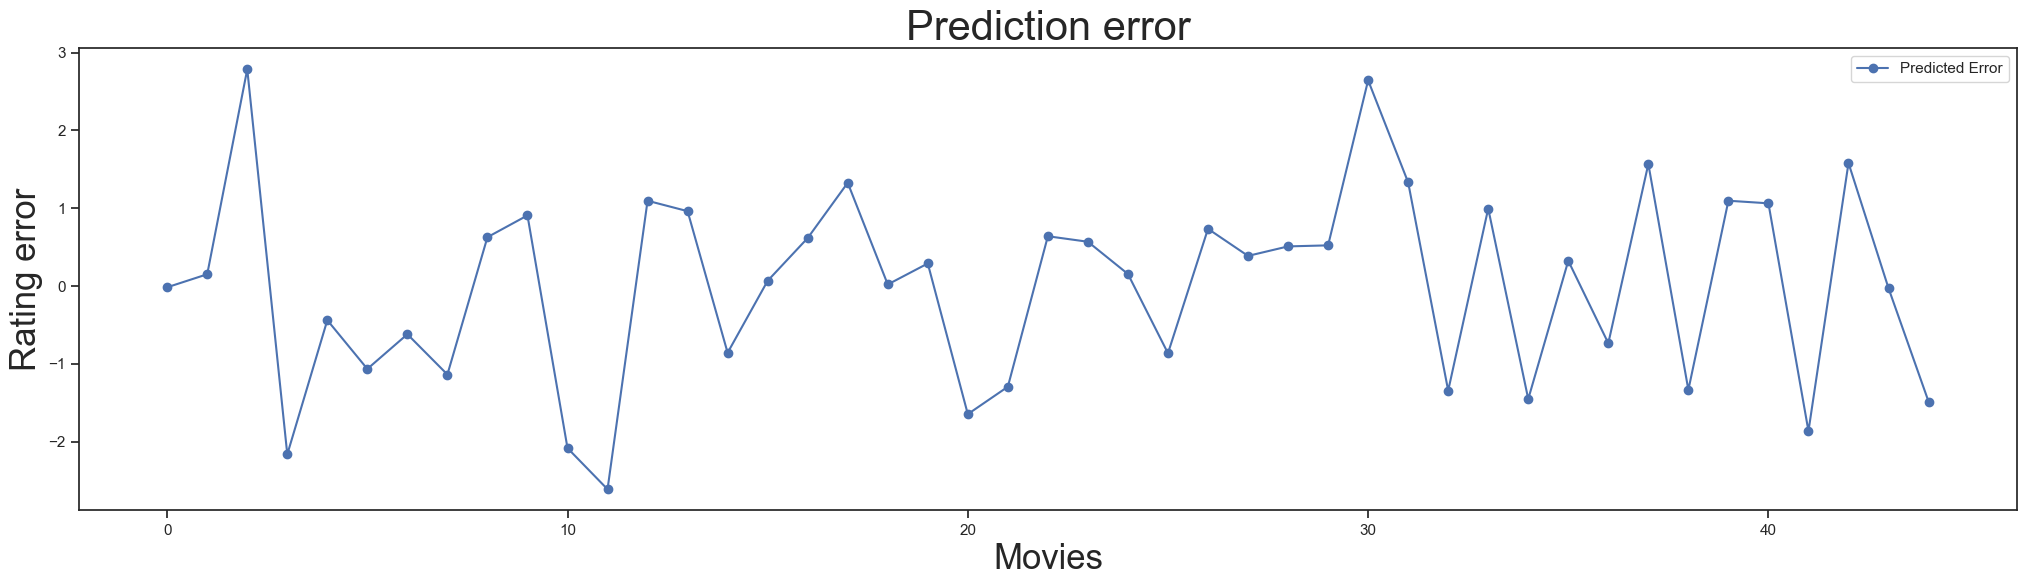

In [212]:
plt.figure(figsize = (25, 6))

plt.plot(length, pred_err, label = "Predicted Error", marker = "o")
plt.title("Prediction error", size = 30)
plt.ylabel("Rating error", size = 25)
plt.xlabel("Movies", size = 25)

plt.legend()
plt.show()

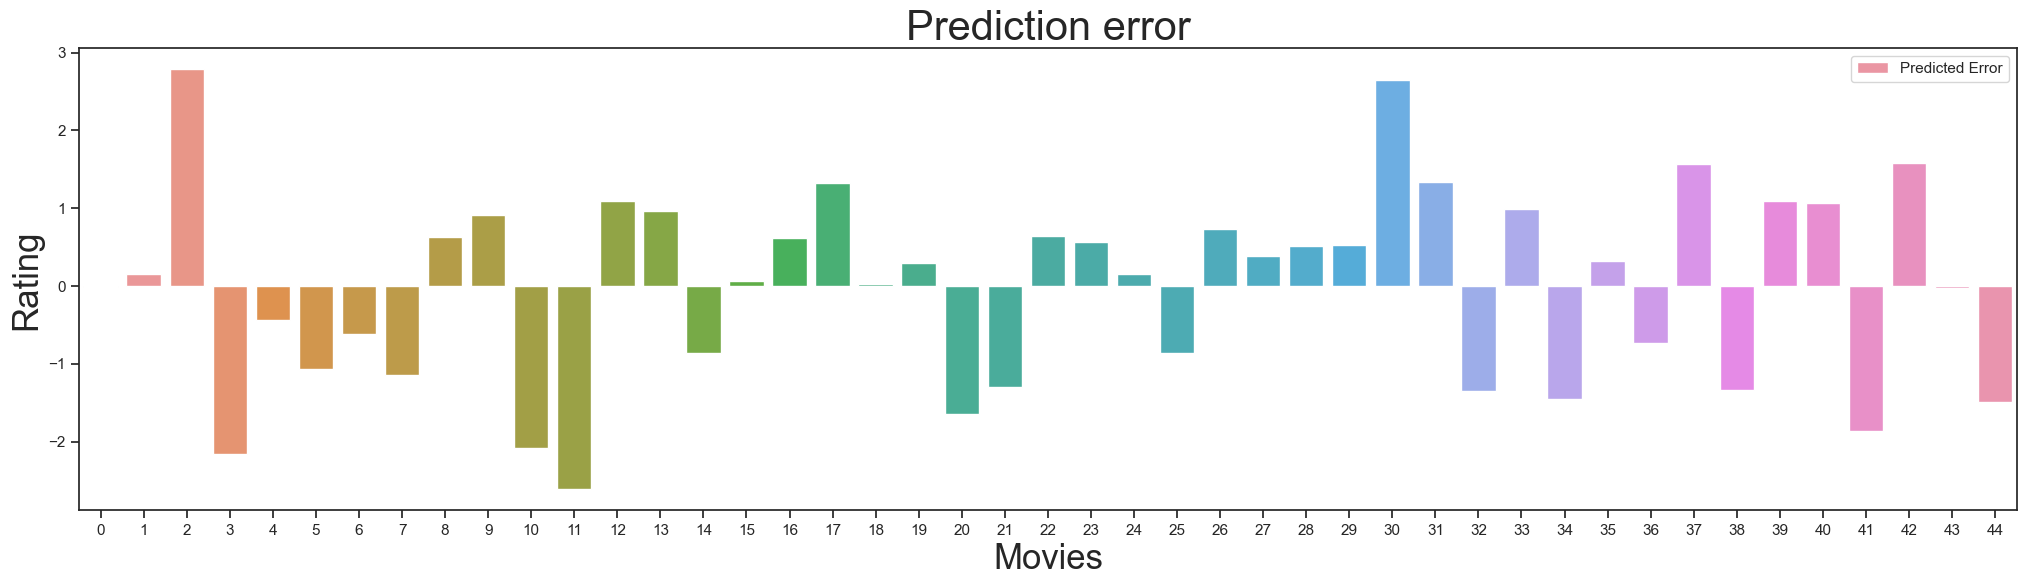

In [210]:
plt.figure(figsize = (25, 6))

sns.barplot(length, pred_err, label = "Predicted Error")
plt.title("Prediction error", size = 30)
plt.ylabel("Rating", size = 25)
plt.xlabel("Movies", size = 25)

plt.legend()
plt.show()

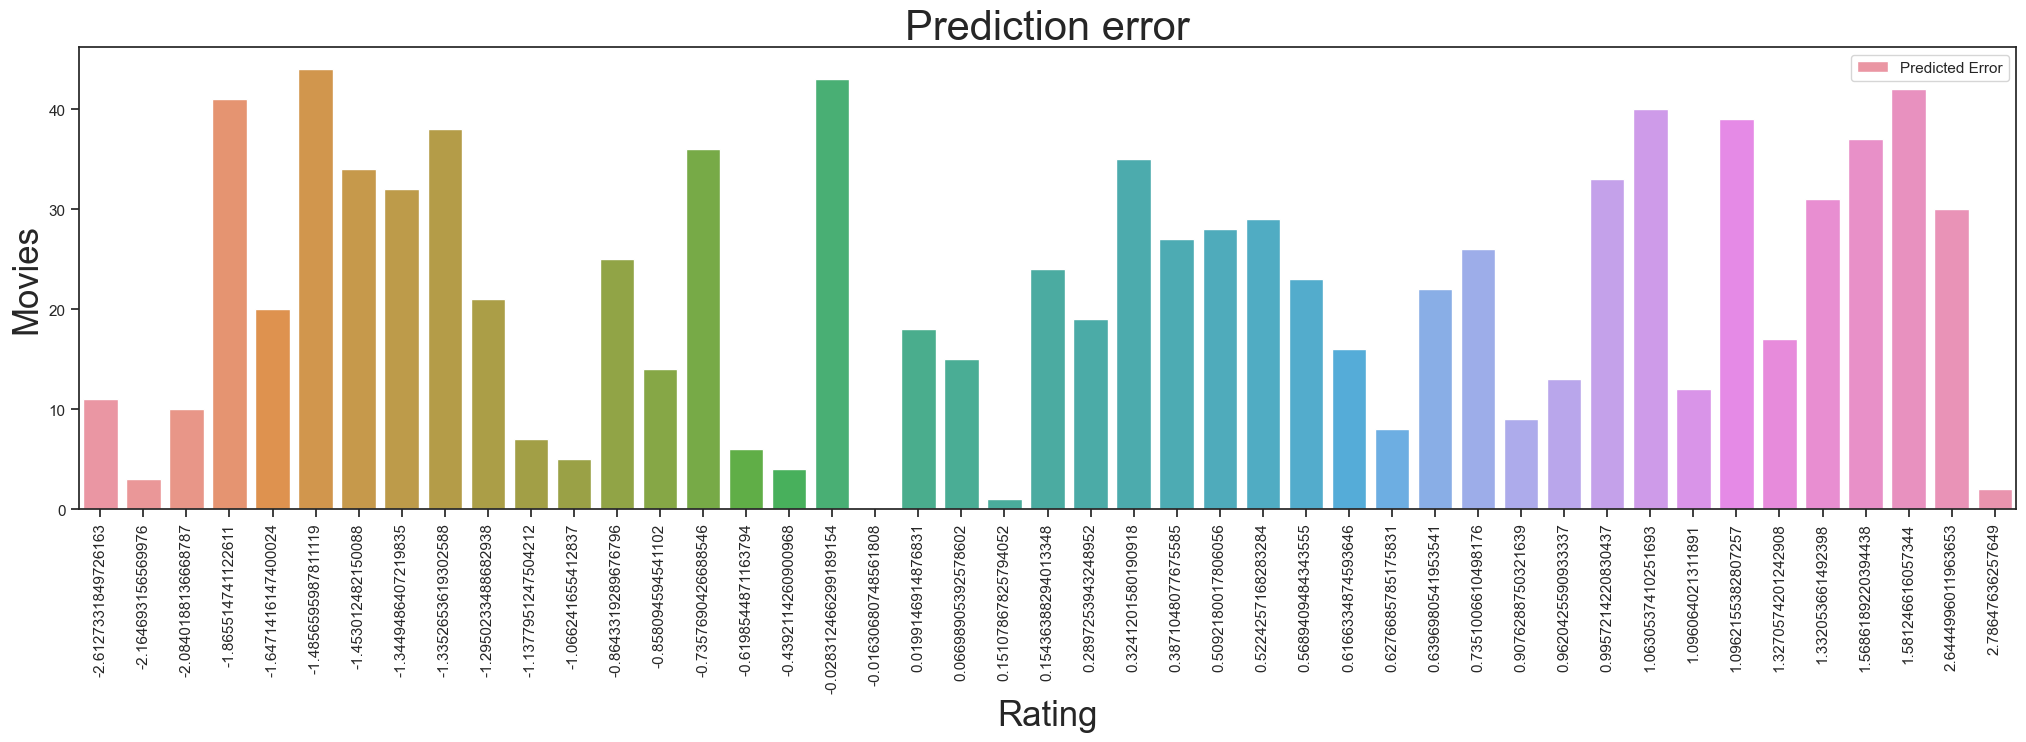

In [209]:
plt.figure(figsize = (25, 6))

sns.barplot(pred_err, length, label = "Predicted Error")
plt.title("Prediction error", size = 30)
plt.xticks(rotation = 90)
plt.xlabel("Rating", size = 25)
plt.ylabel("Movies", size = 25)

plt.legend()
plt.show()